In [1]:
'''
PILLOW
- open an image
- resize image
'''

'\nPILLOW\n- open an image\n- resize image\n'

In [2]:
from PIL import Image

from matplotlib import pyplot as plt
import numpy as np

import matplotlib.image

import string

In [3]:
import os
# prepering directories
path = os.getcwd()
# subfolders
input_dir = os.path.join(path, 'data')
output_dir = os.path.join(path, 'outputs')

(780, 520)


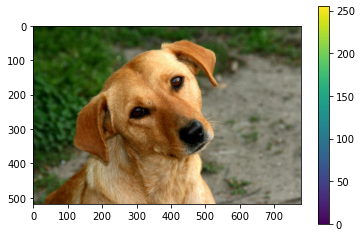

In [4]:
# Open image with pillowa
image = Image.open(os.path.join(input_dir, 'sample_image_dog_1.jpg'))
print(image.size)

# conver pillow file to numpy array 
img_numpy = np.array(image)
plt.imshow(img_numpy) # use matlotlib to display image
plt.colorbar()

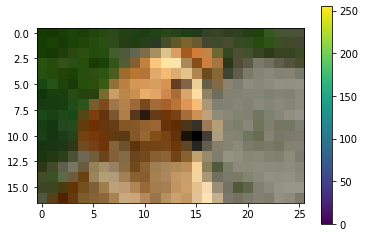

In [5]:
# resize image
small_image = image.resize((  int(image.size[0]/30), int(image.size[1]/30)  ))

img_numpy = np.array(small_image)
plt.imshow(img_numpy) # use matlotlib to display image
plt.colorbar()

#### Save output 

In [6]:
small_image.save(os.path.join(output_dir, 'sample_image_dog_1.jpg'))

#### Crop image

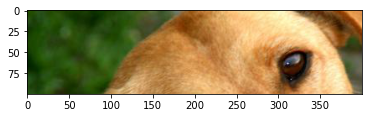

In [7]:
corpped = image.crop((100,100,500,200)) # x,y, x1,y1

img_numpy = np.array(corpped)
plt.imshow(img_numpy)

#### Rotate

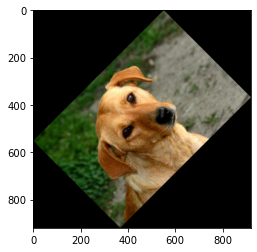

In [8]:
corpped = image.rotate(45, expand=True)

img_numpy = np.array(corpped)
plt.imshow(img_numpy)

#### To grayscale

In [9]:
img = image.convert('L')

img.show()

small_image.save(os.path.join(output_dir, 'sample_image_dog_1_grayscale.jpg'))

img_numpy = np.array(img)

#### Glob to list files in the output directory

In [10]:
import glob
location = os.path.join(output_dir, '*')

# list files in the location
for file in glob.glob(location):
    print(file)

C:\Users\Ukasz\projects\images_\outputs\heart.txt
C:\Users\Ukasz\projects\images_\outputs\new_image_126.jpg
C:\Users\Ukasz\projects\images_\outputs\new_image_126.png
C:\Users\Ukasz\projects\images_\outputs\sad_pepe.txt
C:\Users\Ukasz\projects\images_\outputs\sample_image_dog_1.jpg
C:\Users\Ukasz\projects\images_\outputs\sample_image_dog_1_grayscale.jpg
C:\Users\Ukasz\projects\images_\outputs\scaled_50.jpg
C:\Users\Ukasz\projects\images_\outputs\test.png


### Image is a numpy array 

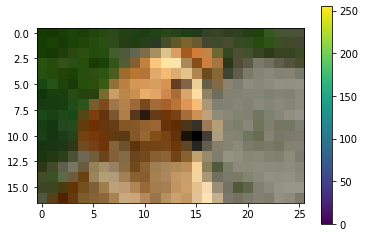

In [11]:
# resize image
small_image = image.resize((  int(image.size[0]/30), int(image.size[1]/30)  ))

img_numpy = np.array(small_image)
plt.imshow(img_numpy) # use matlotlib to display image
plt.colorbar()

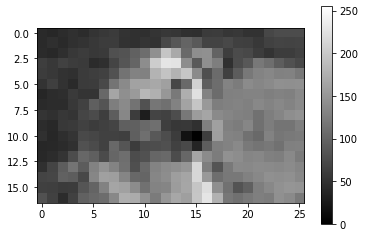

In [12]:
img = small_image.convert('L')

img_numpy = np.array(img)
plt.imshow(img_numpy, cmap='gray', vmin=0, vmax=255) # use matlotlib to display image
plt.colorbar()


In [13]:
# unique pixels
print(len(list(np.unique(img_numpy))))
np.unique(img_numpy)

144


array([  1,  18,  29,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  79,  80,  81,  82,  83,  84,  85,  86,
        88,  89,  90,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 148, 149, 150, 151, 153, 154, 156, 158,
       159, 160, 161, 162, 164, 165, 166, 167, 168, 169, 171, 174, 176,
       177, 179, 180, 184, 195, 197, 198, 205, 209, 215, 222, 224, 228,
       229], dtype=uint8)

In [14]:
# extended_ascii = [chr(i) for i in xrange(256)]
# https://stackoverflow.com/questions/21253869/python-extended-ascii-codes
# https://muthu.co/converting-color-images-to-grayscale-using-numpy-and-some-mathematics/


# https://muthu.co/converting-color-images-to-grayscale-using-numpy-and-some-mathematics/

**WHAT IS DONE to scale image 255-pixel to 128:**
- we convert the image to grayscale 
- we divide a NumPy array by 2 to reduce the number of colors
- we convert floats to integers

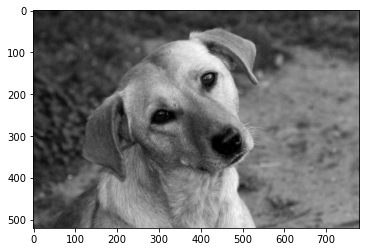

In [15]:
# orginal image
img = image.convert('L')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

0 251
0 125
Total number of unique colors:  126


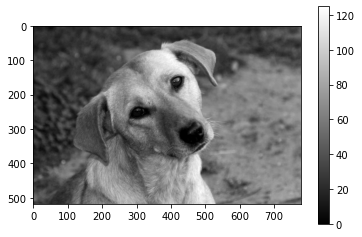

In [16]:
# Creating 128 color numpy array
img_numpy = np.array(img)
print(img_numpy.min(), img_numpy.max())

img_numpy = (img_numpy/2).astype(int)

plt.imshow(img_numpy, cmap='gray', vmin=img_numpy.min(), vmax=img_numpy.max())
print(img_numpy.min(), img_numpy.max())

# unique pixels
print('Total number of unique colors: ', len(list(np.unique(img_numpy))))
np.unique(img_numpy)

# # save numpy image as a new image
matplotlib.image.imsave(os.path.join(output_dir, "new_image_126.png"), img_numpy, cmap='gray')  # saving image in grayscale using matplotlib
plt.colorbar()

**WHAT IS DONE to scale the image 100 different types of pixel values**
- we convert the image to grayscale 
- we convert the pillow object to a numpy array
- we need to convert uint8 to float32 to avoid any Overflow Errors when scaling the NumPy array
- we scale the image from 255 pixel types to 99
- we convert the float type array back to the uint8 type

[[ 23  24  26 ...  80  80  79]
 [ 23  24  26 ...  79  79  78]
 [ 23  24  26 ...  81  80  80]
 ...
 [ 57  56  54 ... 126 125 123]
 [ 52  52  51 ... 128 126 125]
 [ 50  50  51 ... 129 127 126]] Datatype: uint8
[[ 23.  24.  26. ...  80.  80.  79.]
 [ 23.  24.  26. ...  79.  79.  78.]
 [ 23.  24.  26. ...  81.  80.  80.]
 ...
 [ 57.  56.  54. ... 126. 125. 123.]
 [ 52.  52.  51. ... 128. 126. 125.]
 [ 50.  50.  51. ... 129. 127. 126.]] Datatype: float32
0.0 251.0
[[ 9.071713  9.466135 10.25498  ... 31.553785 31.553785 31.159363]
 [ 9.071713  9.466135 10.25498  ... 31.159363 31.159363 30.76494 ]
 [ 9.071713  9.466135 10.25498  ... 31.948208 31.553785 31.553785]
 ...
 [22.48207  22.08765  21.298805 ... 49.697212 49.302788 48.513943]
 [20.50996  20.50996  20.115538 ... 50.486057 49.697212 49.302788]
 [19.721115 19.721115 20.115538 ... 50.880478 50.091633 49.697212]] Float type : float32
0.0 99.0
[[ 9  9 10 ... 31 31 31]
 [ 9  9 10 ... 31 31 30]
 [ 9  9 10 ... 31 31 31]
 ...
 [22 22 21 ... 49 

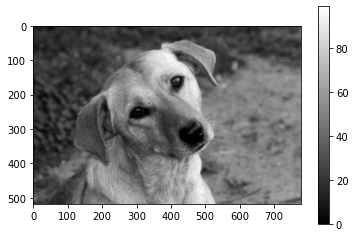

In [17]:
# Creating 100 color numpy array
# https://numpy.org/doc/stable/user/basics.types.html
'''
Note when we create a NumPy array from a pillow object we get uint8 and sometimes when we want to perform some math this can lead to Overflow Errors.
Overflow Errors: https://numpy.org/doc/stable/user/basics.types.html#overflow-errors
The fixed size of NumPy numeric types may cause overflow errors when a value requires more memory than available in the data type. 
To avoid it we can convert uint8 to float32 do the math and then convert the array back to uint8?

'''
image = Image.open(os.path.join(input_dir, 'sample_image_dog_1.jpg'))

img = image.convert('L')

img_numpy = np.array(img)

print(img_numpy,'Datatype:', img_numpy.dtype)

img_numpy = img_numpy.astype(np.float32)

print(img_numpy,'Datatype:', img_numpy.dtype)

max_pixel = img_numpy.max()
min_pixel = img_numpy.min()

print(min_pixel, max_pixel)

norma = (img_numpy * 99)/img_numpy.max()
print(norma,'Float type :', img_numpy.dtype)
print(norma.min(), norma.max())

norma = norma.astype(np.uint8)
print(norma,'Confirming that the data is properly converted from float to uint8:', norma.dtype)
print(norma.min(), norma.max())

plt.imshow(norma, cmap='gray', vmin=norma.min(), vmax=norma.max())
plt.colorbar()

In [18]:
np.unique(norma) # unique pixel values after scaling from 255 to 100

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=uint8)

In [19]:
len(list(np.unique(norma)))

100

**WHAT IS DONE to scale the image 50 different types of pixel values**
- we convert the image to grayscale 
- we convert the pillow object to a numpy array
- we need to convert uint8 to float32 to avoid any Overflow Errors when scaling the NumPy array
- we scale the image from 255 pixel types to 49
- we convert the float type array back to the uint8 type

[[ 23  24  26 ...  80  80  79]
 [ 23  24  26 ...  79  79  78]
 [ 23  24  26 ...  81  80  80]
 ...
 [ 57  56  54 ... 126 125 123]
 [ 52  52  51 ... 128 126 125]
 [ 50  50  51 ... 129 127 126]] Datatype: uint8
[[ 23.  24.  26. ...  80.  80.  79.]
 [ 23.  24.  26. ...  79.  79.  78.]
 [ 23.  24.  26. ...  81.  80.  80.]
 ...
 [ 57.  56.  54. ... 126. 125. 123.]
 [ 52.  52.  51. ... 128. 126. 125.]
 [ 50.  50.  51. ... 129. 127. 126.]] Datatype: float32
0.0 251.0
[[ 4.49004    4.685259   5.0756974 ... 15.61753   15.61753   15.422311 ]
 [ 4.49004    4.685259   5.0756974 ... 15.422311  15.422311  15.227092 ]
 [ 4.49004    4.685259   5.0756974 ... 15.812749  15.61753   15.61753  ]
 ...
 [11.12749   10.932271  10.541833  ... 24.59761   24.40239   24.011951 ]
 [10.151395  10.151395   9.956175  ... 24.988049  24.59761   24.40239  ]
 [ 9.760956   9.760956   9.956175  ... 25.183268  24.79283   24.59761  ]] Float type : float32
0.0 49.0
[[ 4  4  5 ... 15 15 15]
 [ 4  4  5 ... 15 15 15]
 [ 4  4  5 .

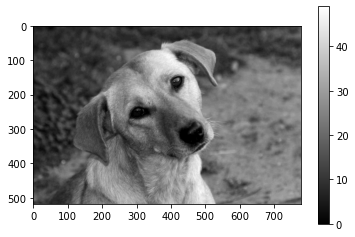

In [20]:
image = Image.open(os.path.join(input_dir, 'sample_image_dog_1.jpg'))

img = image.convert('L')

img_numpy = np.array(img)

print(img_numpy,'Datatype:', img_numpy.dtype)

img_numpy = img_numpy.astype(np.float32)

print(img_numpy,'Datatype:', img_numpy.dtype)

max_pixel = img_numpy.max()
min_pixel = img_numpy.min()

print(min_pixel, max_pixel)

norma = (img_numpy * 49)/img_numpy.max()
print(norma,'Float type :', img_numpy.dtype)
print(norma.min(), norma.max())

norma = norma.astype(np.uint8)
print(norma,'Confirming that the data is properly converted from float to uint8:', norma.dtype)
print(norma.min(), norma.max())

plt.imshow(norma, cmap='gray', vmin=norma.min(), vmax=norma.max())
plt.colorbar()

output = Image.fromarray(norma)
output.save(os.path.join(output_dir, 'scaled_50.jpg'))

In [21]:
np.unique(norma) # unique pixel values after scaling from 255 to 50

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=uint8)

In [22]:
len(list(np.unique(norma)))

50

#### Is it right????

## Image to ASCII how:
- open an image using pillow
- resize the image using pillow 
- turn image to one band, in this case we use the gray scale
- convert the pil object into a numpy array
- convert the numpy array uint8 to float
- down-scale the image to reduce the number of unique pixels; you need to check what is the best for your image
- convert back the uint8 to float 
- create the list of characters that would replace each of unique pixels using 'string' Python library
- generate a random list of characters for the image pixels representation
- convert the numpy array from the uint8 to string format
- using loop replace pixels with characters;
- save the numpy array to a text file 
- Done!

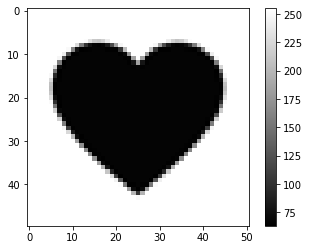

In [23]:
# resize image then to grayscale
# image = Image.open(os.path.join(input_dir, 'sample_image_dog_1.jpg'))
image = Image.open(os.path.join(input_dir, 'istockphoto-1128400054-612x612.jpg'))

small_image = image.resize((  int(image.size[0]/12), int(image.size[1]/12)  ))
img_numpy = np.array(small_image)
img = small_image.convert('L')
img_numpy = np.array(img)
plt.imshow(img_numpy, cmap='gray', vmin=img_numpy.min(), vmax=img_numpy.max())
plt.colorbar()

Confirming that the data is properly converted from float to uint8: uint8
2 10
Unique pixels [ 2  3  4  5  6  7  8  9 10]
Count of unique pixels: 9


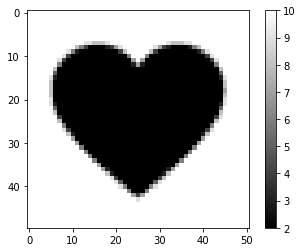

In [24]:
# scaling the pixels to 50
img_numpy = img_numpy.astype(np.float32)
img_numpy = (img_numpy * 10)/img_numpy.max()
img_numpy = img_numpy.astype(np.uint8)

print('Confirming that the data is properly converted from float to uint8:', img_numpy.dtype)
print(img_numpy.min(), img_numpy.max())

plt.imshow(img_numpy, cmap='gray', vmin=img_numpy.min(), vmax=img_numpy.max())
plt.colorbar()

print('Unique pixels', np.unique(img_numpy))
print('Count of unique pixels:', len(list(np.unique(img_numpy))))


In [25]:
# https://java2blog.com/print-a-matrix-in-python/
print(img_numpy)

[[10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 ...
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]]


In [26]:
for i in range(img_numpy.shape[0]):
    print( ''.join([str(x) for x in img_numpy[i]]))

101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010
101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010
101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010
101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010
101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010
101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010
101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010
101010101010101010101010109988891010101010101010101010101098889910101010101010101010101010
10101010101010101010108642222347910101010101010974322223681010101010101010101010
10101010101010101096322222222248101010101084222222222369101010101010101010
10101010101010109422222222222226

#### convert matrix of numbers to matrix of ASCI characters

In [27]:
# get ascii characters
# https://docs.python.org/3/library/string.html#string-constants
characters = list(string.printable)
print(characters)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', ' ', '\t', '\n', '\r', '\x0b', '\x0c']


In [28]:
characters = characters[:-5]
len(characters)

95

In [29]:
# get n random characters from a list without duplicates
from random import randrange

pixels = []

while len(pixels) < len(list(np.unique(img_numpy))):
    index = randrange(len(characters))
    ch = characters.pop(index)
    pixels.append(ch)

In [30]:
# checking if all unique values in the pixel list
len(set(pixels)) == len(list(np.unique(img_numpy)))

True

In [31]:
# converting matrix of numbers to matrix of ASCI characters
unique = list(np.unique(img_numpy))
ascii_numpy = img_numpy.astype(str)

for index, value in enumerate(unique):
    ascii_numpy[ascii_numpy == str(value)] = pixels[index]

In [32]:
for i in range(ascii_numpy.shape[0]):
    print( ' '.join([str(x) for x in ascii_numpy[i]]))

~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~
~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~
~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~
~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~
~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~
~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~
~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~
~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ m m b b b m ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ m b b b m m ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~
~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ b 4 F T T T T c F : m ~ ~ ~ ~ ~ ~ ~ m : F c T T T T c 4 b ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~
~ ~ ~ ~ ~ ~ ~ ~ ~ m 4 c T T T T T T T T T F b ~ ~ ~ ~ ~ b F T T T T T T T T T c 4 

### Save outut to TEXT file

In [33]:
# save ASCII image to a text file
# open file
f = open(os.path.join(output_dir, 'heart.txt'), 'w')
 
# write to file
for i in range(ascii_numpy.shape[0]):
    row = ' '.join([str(x) for x in ascii_numpy[i]])
    f.write(row + '\n')

# cleanup
f.close()

In [34]:
#### SAD PEPE

Orginal image dimensions:  (500, 438)


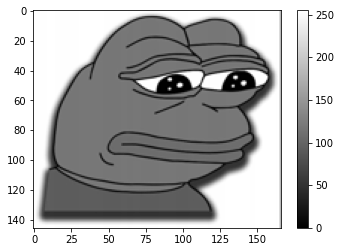

In [35]:
image = Image.open(os.path.join(input_dir, 'sad-pepe.jfif'))
print('Orginal image dimensions: ', image.size)

small_image = image.resize((  int(image.size[0]/3), int(image.size[1]/3)  ))
img = small_image.convert('L')
img_numpy = np.array(img)
plt.imshow(img_numpy, cmap='gray', vmin=img_numpy.min(), vmax=img_numpy.max())
plt.colorbar()

In [36]:
print('Unique pixels', np.unique(img_numpy))
print('Count of unique pixels:', len(list(np.unique(img_numpy))))

Unique pixels [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 

Confirming that the data is properly converted from float to uint8: uint8
0 10
Unique pixels [ 0  1  2  3  4  5  6  7  8  9 10]
Count of unique pixels: 11


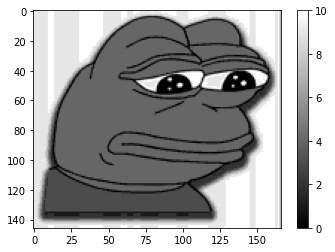

In [37]:
# scaling the pixels to 10
img_numpy = img_numpy.astype(np.float32)
img_numpy = (img_numpy * 10)/img_numpy.max()
img_numpy = img_numpy.astype(np.uint8)

print('Confirming that the data is properly converted from float to uint8:', img_numpy.dtype)
print(img_numpy.min(), img_numpy.max())

plt.imshow(img_numpy, cmap='gray', vmin=img_numpy.min(), vmax=img_numpy.max())
plt.colorbar()

print('Unique pixels', np.unique(img_numpy))
print('Count of unique pixels:', len(list(np.unique(img_numpy))))

In [38]:
# get ascii characters
# https://docs.python.org/3/library/string.html#string-constants
characters = list(string.printable)
print(characters)
characters = characters[:20]
print(characters)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', ' ', '\t', '\n', '\r', '\x0b', '\x0c']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']


In [39]:
# get n random characters from a list without duplicates
from random import randrange

pixels = []

while len(pixels) < len(list(np.unique(img_numpy))):
    index = randrange(len(characters))
    ch = characters.pop(index)
    pixels.append(ch)

# converting matrix of numbers to matrix of ASCI characters
unique = list(np.unique(img_numpy))
ascii_numpy = img_numpy.astype(str)

for index, value in enumerate(unique):
    ascii_numpy[ascii_numpy == str(value)] = pixels[index]

In [40]:
# save ASCII image to a text file
# open file
f = open(os.path.join(output_dir, 'sad_pepe.txt'), 'w')
 
text = ''    
    
# write to file
for i in range(ascii_numpy.shape[0]):
    row = ' '.join([str(x) for x in ascii_numpy[i]])
    text += row + '\n'
    
    f.write(row + '\n')

# cleanup
f.close()

### Save Text to PNG USING PILLOW

In [41]:
# source https://stackoverflow.com/questions/17856242/how-to-convert-a-string-to-an-image
# https://stackoverflow.com/questions/7698231/pil-draw-multiline-text-on-image
# https://www.geeksforgeeks.org/adding-text-on-image-using-python-pil/